In [2]:
import sys
sys.path.append('/Users/Jake/anaconda3/lib/python3.7/site-packages')

import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def make_nice_ax(ax):
    ax.tick_params(axis='both', which='major', direction='in', length=9,   top=True, right=True)
    ax.tick_params(axis='both', which='minor', direction='in', length=4.5, top=True, right=True)
    return ax

In [4]:
df = pd.read_csv("/Users/Jake/Desktop/Research/Dilepton_Mass_Resonance/BR_table.csv")

In [5]:
x_label = r'$m_{ \mathrm{Z_{d}} }$'
y1_label = r'Br($\mathrm{Z_{d}} \rightarrow \ell\ell$)'
y2_label = r'Br(H$ \rightarrow \mathrm{Z_{d}} \mathrm{Z}^{*} \rightarrow 4\ell) / \epsilon ^{2}$'
label_hTOzdzdTO4l = r'Br(H$ \rightarrow \mathrm{Z_{d} Z_{d}} \rightarrow 4\ell) / {\kappa^{\prime}}^2$'

mZd_ls = [4.0, 62.5]

In [6]:
mZd_min = mZd_ls[0]
mZd_max = mZd_ls[1]

mZd_mask = (mZd_min <= df['mZD']) & (df['mZD'] <= mZd_max)

mZd_ser = df[mZd_mask]['mZD'].astype(float)
br_ZdTOll_per_epssquared_ser = df[mZd_mask]['Br(ZD->ll)/epsilon^2'].astype(float)
br_hTOzdzstar_per_epssquared_ser = df[mZd_mask]['Br(h->ZDZ^(*)->4l)/epsilon^2'].astype(float)
br_hTOzdzdTO4l_ser = df[mZd_mask]['Br(h->ZDZD->4l)/kappaprime^2'].astype(float)

## Make the H to ZZd plots.

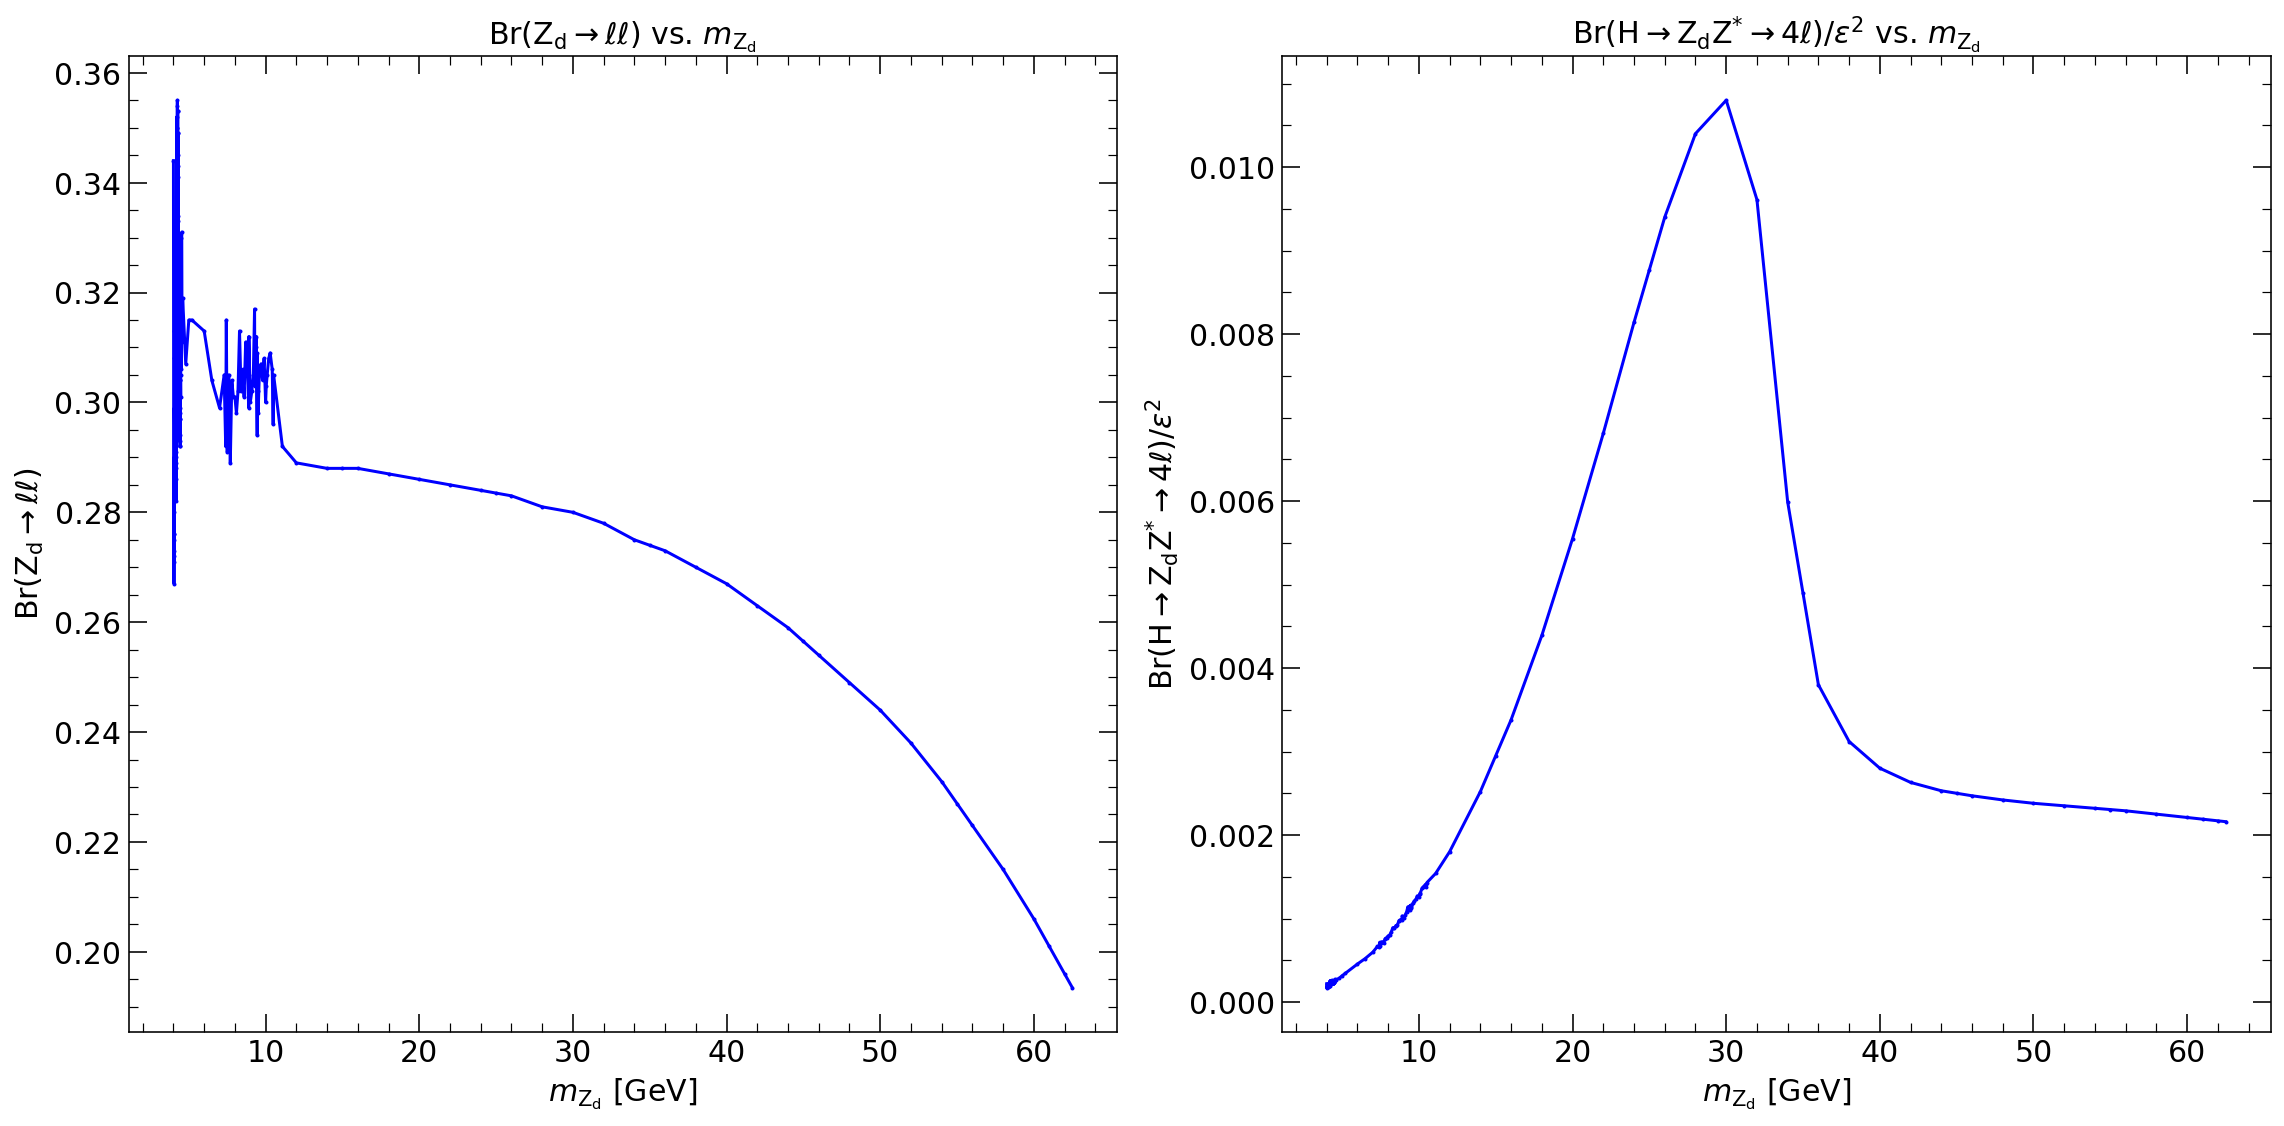

In [7]:
%config InlineBackend.figure_format ='retina'

fontsize = '15'
#labelpad = 10

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)

ax1.set_xlabel(f"{x_label} [GeV]", fontsize=fontsize)
ax1.set_ylabel(y1_label, fontsize=fontsize)
ax1.tick_params(labelsize=fontsize)

ax1.set_title(f"{y1_label} vs. {x_label}", fontsize=fontsize)

# ax1.grid(True,which='both')
ax1 = make_nice_ax(ax1)
plt.minorticks_on()
ax1.plot(mZd_ser, br_ZdTOll_per_epssquared_ser, marker='o', c='b', markersize=1)


ax2 = fig.add_subplot(122)
ax2.set_xlabel(f"{x_label} [GeV]", fontsize=fontsize)
ax2.set_ylabel(y2_label, fontsize=fontsize)
ax2.tick_params(labelsize=fontsize)

ax2.set_title(f"{y2_label} vs. {x_label}", fontsize=fontsize)
# ax2.grid(True,which='both')

ax2 = make_nice_ax(ax2)
plt.minorticks_on()

# ax2.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax2.plot(mZd_ser, br_hTOzdzstar_per_epssquared_ser, marker='o', c='b', markersize=1)
plt.tight_layout()

# plt.savefig("/Users/Jake/Desktop/branching_ratios_plot.pdf")#, dpi = 100)

## Make the H to ZdZd plot.

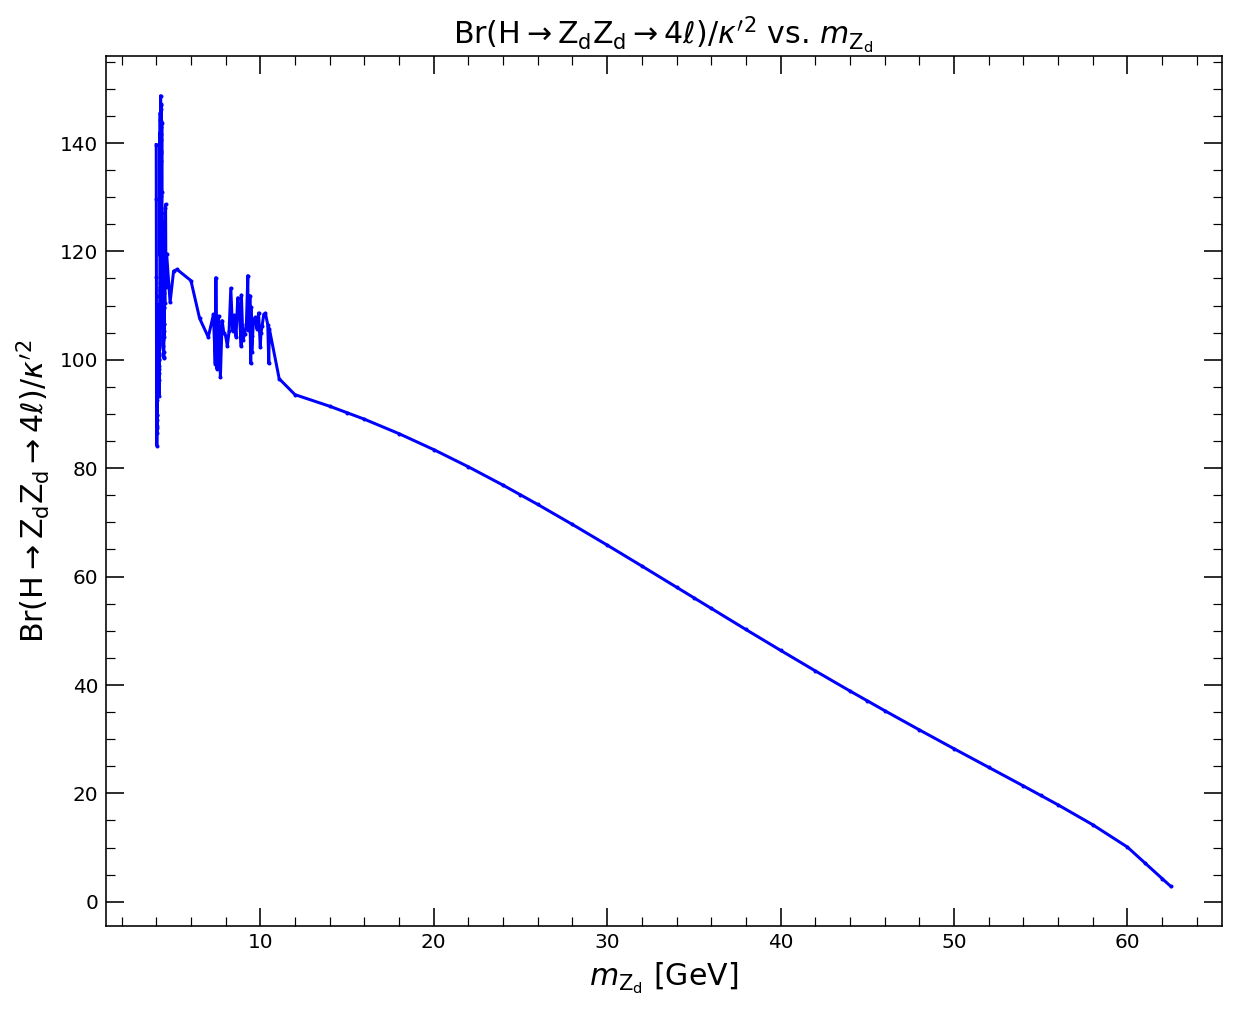

In [8]:
%config InlineBackend.figure_format ='retina'

fontsize = '15'

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.set_xlabel(f"{x_label} [GeV]", fontsize=fontsize)
ax.set_ylabel(label_hTOzdzdTO4l, fontsize=fontsize)
# ax.tick_params(reset=True)

ax.set_title(f"{label_hTOzdzdTO4l} vs. {x_label}", fontsize=fontsize)

# ax.set_ylim([0,130])
# ax.grid(True,which='both')
ax = make_nice_ax(ax)
plt.minorticks_on()
# plt.locator_params(axis='y', nbins=6)
# ax.xaxis.set_minor_locator(plt.MaxNLocator(10))

ax.plot(mZd_ser, br_hTOzdzdTO4l_ser, marker='o', c='b', markersize=1)
# plt.show()
# plt.savefig("/Users/Jake/Desktop/Research/TMPNAME_Dilepton_Mass_Resonance/plot_BR_hTOzdzd.pdf")#, dpi = 100)